In [1]:
import warnings
warnings.filterwarnings("ignore")

To Take dfSet From Google Cloud

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score


Read the dfSet

In [4]:
df = pd.read_csv('merged_output.csv', encoding='utf-8')
# df['Label'] = df[' Label']
# df = df.drop([' Label'], axis=1)
# df.to_csv('merged_output.csv', encoding='utf-8', index=False)

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


dfset Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359759 entries, 0 to 2359758
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

dfset Columns

In [7]:
df.columns


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

Basic Statistics

In [8]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.358863e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2359759.0,2.359759e+06,2359759.0,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2359759.0,2359759.0,2359759.0,2359759.0,2359759.0,2359759.0,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06,2.359759e+06
mean,8.257794e+03,1.394871e+07,1.001188e+01,1.129158e+01,5.590636e+02,1.807129e+04,2.099614e+02,1.884479e+01,5.911160e+01,6.975604e+01,8.372490e+02,4.034894e+01,2.951997e+02,3.221025e+02,inf,inf,1.211706e+06,2.675747e+06,8.255354e+06,1.347163e+05,1.364168e+07,2.462935e+06,2.865470e+06,8.107765e+06,1.040995e+06,9.692056e+06,1.807479e+06,1.340825e+06,4.406267e+06,1.028220e+06,4.721838e-02,0.0,1.334882e-04,0.0,-3.121873e+04,-2.758314e+03,6.081589e+04,7.367310e+03,1.623365e+01,9.218600e+02,1.691986e+02,2.880705e+02,4.840179e+05,2.850545e-02,4.721838e-02,2.089196e-04,3.218252e-01,3.055630e-01,9.525930e-02,1.334882e-04,2.097672e-04,7.000622e-01,1.891978e+02,5.911160e+01,2.951997e+02,-3.121873e+04,0.0,0.0,0.0,0.0,0.0,0.0,1.001188e+01,5.590510e+02,1.129158e+01,1.807092e+04,7.408859e+03,2.055026e+03,5.868343e+00,-3.294184e+03,8.646566e+04,4.230741e+04,1.594086e+05,6.249637e+04,7.319520e+06,5.526871e+05,7.737322e+06,6.888293e+06
std,1.844218e+04,3.277517e+07,8.203287e+02,1.091259e+03,1.076008e+04,2.476492e+06,7.448803e+02,6.390215e+01,1.940619e+02,2.939860e+02,1.915629e+03,6.836675e+01,5.978312e+02,8.311906e+02,NaN,NaN,4.232551e+06,7.679218e+06,2.281210e+07,2.560493e+06,3.268837e+07,9.459076e+06,8.850755e+06,2.289336e+07,8.656079e+06,2.847166e+07,9.104808e+06,5.819284e+06,1.636774e+07,8.577005e+06,2.121057e-01,0.0,1.155294e-02,0.0,2.305831e+07,1.590543e+06,2.395244e+05,3.911872e+04,2.472972e+01,2.008181e+03,3.082447e+02,6.333001e+02,1.704126e+06,1.664119e-01,2.121057e-01,1.445255e-02,4.671765e-01,4.606456e-01,2.935728e-01,1.155294e-02,1.448183e-02,7.015539e-01,3.358807e+02,1.940619e+02,5.978312e+02,2.305831e+07,0.0,0.0,0.0,0.0,0.0,0.0,8.203287e+02,1.074502e+04,1.091259e+03,2.47645

df Analysis

Missing Values

In [9]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Label                          0
Length: 79, dtype: int64

Find the Missing Value Feature

In [10]:
[feature for feature in df.columns if df[feature].isnull().sum() > 0]

['Flow Bytes/s']

Replace large or infinite values with Null and Drop The Null Values

In [11]:
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

Drop the Duplicates

In [12]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 243044


In [13]:
df = df.drop_duplicates()

In [14]:
[feature for feature in df.columns if df[feature].isnull().sum() > 0]

[]

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split


# Load dfset

df.columns = df.columns.str.strip()

# Remove infinite values and NaNs
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Define Features and Target
y = df['Label']
X = df.drop('Label', axis=1)

# Label Encoding for Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y = y_encoded

# Remove constant features
constant_features = [col for col in X.columns if X[col].nunique() == 1]
X.drop(columns=constant_features, inplace=True)

# Standard Scaling for most methods
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=['Label'])
y_test = pd.DataFrame(y_test, columns=['Label'])


ensemble_features = ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Max Packet Length', 'Packet Length Std', 'Packet Length Variance', 'Avg Bwd Segment Size', 'Bwd Packet Length Std', 'Flow IAT Max', 'Packet Length Mean', 'Average Packet Size', 'Fwd IAT Std', 'Fwd IAT Max', 'PSH Flag Count', 'Idle Mean', 'Idle Max', 'Idle Min', 'Init_Win_bytes_forward', 'Flow Duration', 'Flow IAT Std', 'Fwd IAT Total']

print(len(X_train.columns))
print(len(X_test.columns))


X_train = X_train[ensemble_features]
X_test = X_test[ensemble_features]

print(len(X_train))
print(len(X_test))

70
70
1691635
422909


In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Convert DataFrame to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values.ravel()

# Check encoded values (example)
print(np.unique(y_train_np, return_counts=True))  # To find the encoded value for 'BENIGN'

# Assume 'BENIGN' is encoded as 0
benign_encoded_value = 0  

# Apply undersampling using encoded value
rus = RandomUnderSampler(sampling_strategy={benign_encoded_value: 150000}, random_state=42)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train_np, y_train_np)

# Convert back to DataFrame (no need to decode labels)
X_train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train = pd.DataFrame(y_train_resampled, columns=['Label'])

# Print class distribution after undersampling
print("Class distribution after undersampling:")
print(pd.Series(y_train_resampled).value_counts())


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([1412082,    1559,  102411,   85474,    4182,    4308,    4745,
            29,   72555,    2575,    1176,      17,     522]))
Class distribution after undersampling:
0     150000
2     102411
3      85474
8      72555
6       4745
5       4308
4       4182
9       2575
1       1559
10      1176
12       522
7         29
11        17
Name: count, dtype: int64


In [19]:
df['Label'] = df['Label'].str.replace("�", "-", regex=False) 
df['Label'].value_counts()

Label
BENIGN                        1765103
DDoS                           128014
DoS Hulk                       106843
PortScan                        90694
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack - Brute Force         1470
Web Attack - XSS                  652
Infiltration                       36
Web Attack - Sql Injection         21
Name: count, dtype: int64

Attacks in the df set

In [16]:
attack_names = df['Label'].value_counts().index
attack_names

Index(['BENIGN', 'DDoS', 'DoS Hulk', 'PortScan', 'FTP-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'SSH-Patator', 'Bot',
       'Web Attack - Brute Force', 'Web Attack - XSS', 'Infiltration',
       'Web Attack - Sql Injection'],
      dtype='object', name='Label')

In [17]:
attack_values = df['Label'].value_counts().values
attack_values

array([1765103,  128014,  106843,   90694,    5931,    5385,    5228,
          3219,    1948,    1470,     652,      36,      21])

df Visualization

Pie Chart for Class Distribution

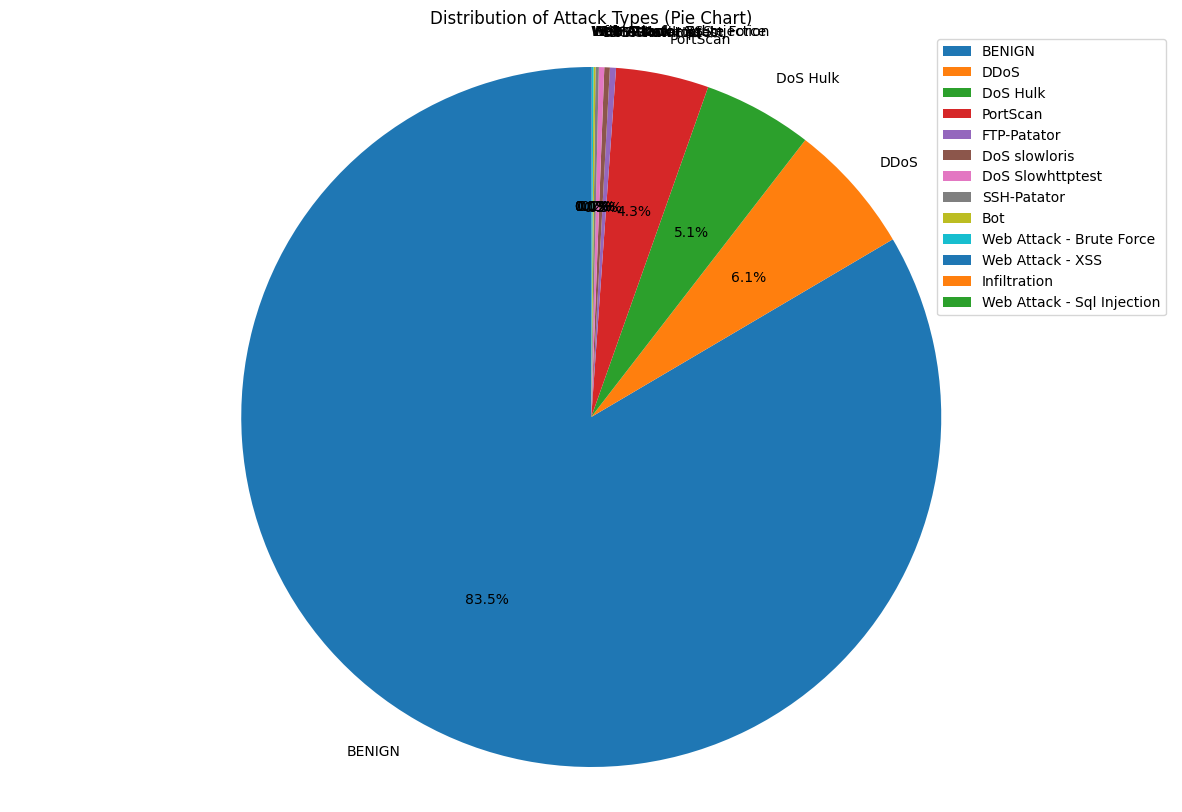

In [18]:
plt.figure(figsize=(15, 10))
plt.pie(attack_values, labels=attack_names, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Attack Types (Pie Chart)')
plt.legend()
plt.axis('equal')
plt.show()

Count Plot 

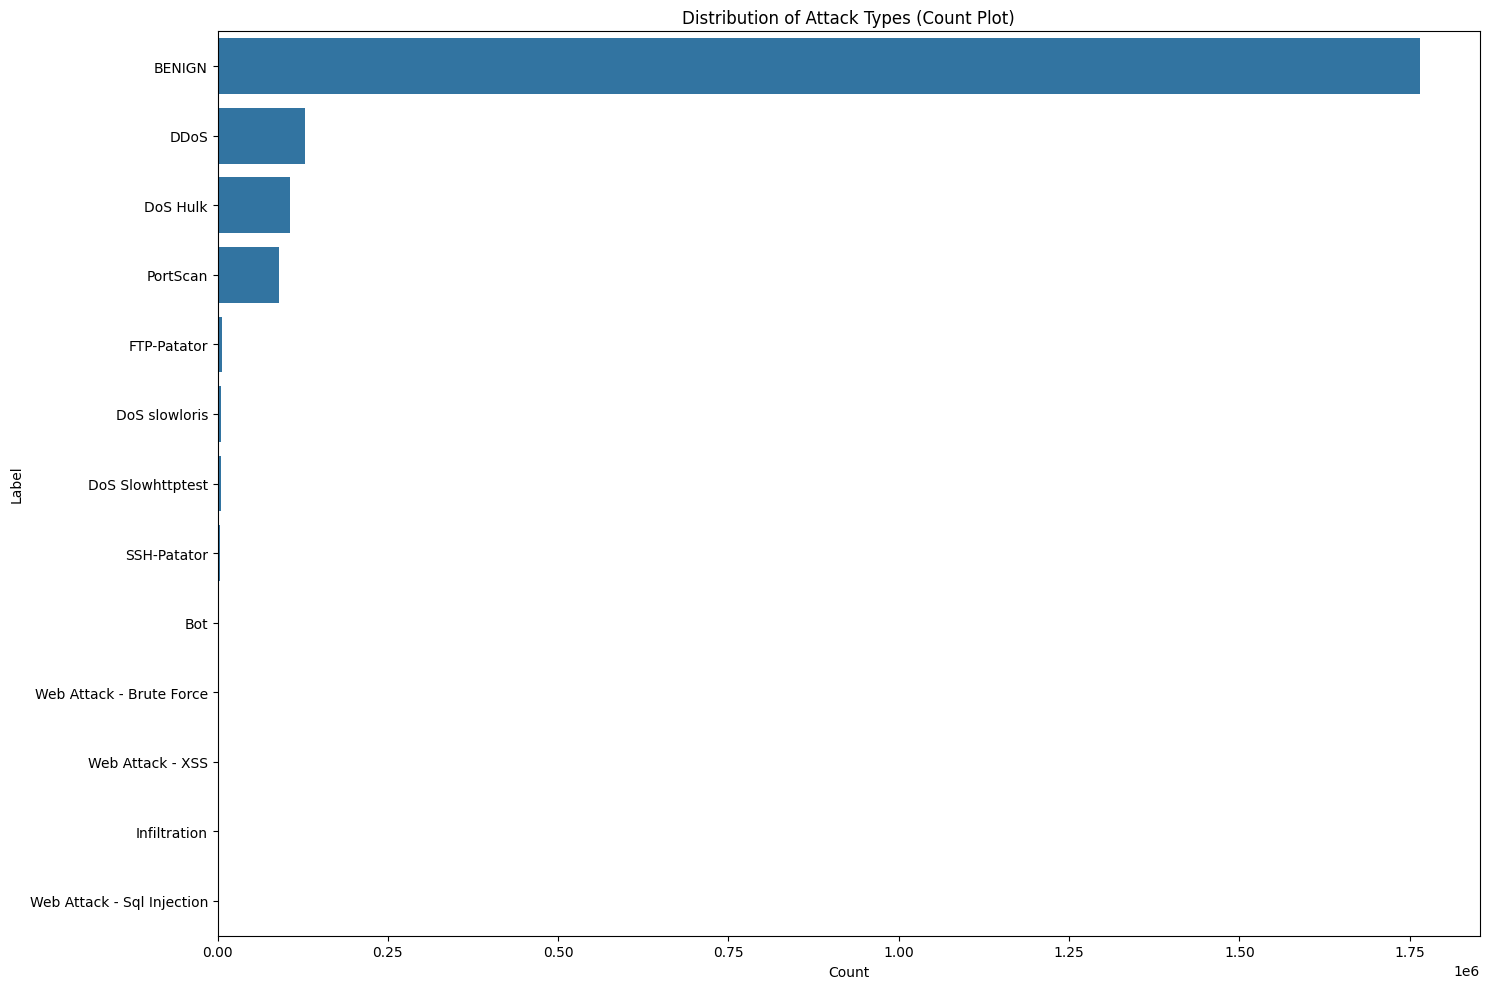

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Label', df=df, order = df['Label'].value_counts().index)
plt.title('Distribution of Attack Types (Count Plot)')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

Observations

Class Imbalance

1. The dfset is highly imbalanced, with BENIGN traffic having the highest count (1.9 million) and some attack types having significantly lower occurrences (e.g., Web Attack - SQL Injection with only 21 instances).
2. The imbalance may affect model performance, making it biased toward the majority class.

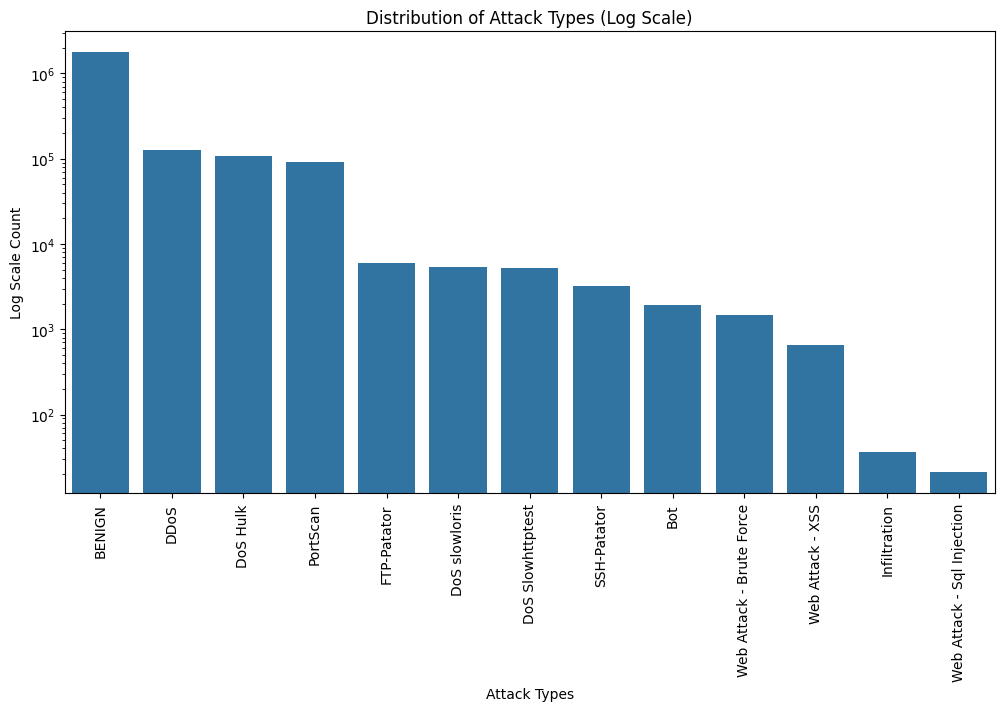

In [20]:

plt.figure(figsize=(12, 6))
sns.barplot(x=attack_names, y=attack_values)
plt.yscale("log")  # Applying log scale
plt.xticks(rotation=90)
plt.xlabel("Attack Types")
plt.ylabel("Log Scale Count")
plt.title("Distribution of Attack Types (Log Scale)")
plt.show()


Observations:-


1.PortScan, DoS Hulk, and DDoS are the top attack types.
2.Rare attack types contribute less than 1%, which means models may struggle to detect them.

 Cumulative Distribution Plot to Show Imbalance

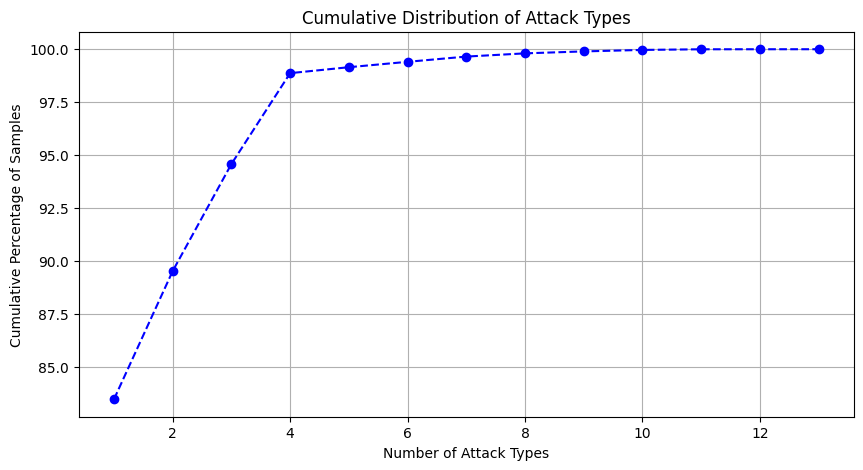

In [21]:
import numpy as np

sorted_values = np.sort(attack_values)[::-1]  
cumulative_percent = np.cumsum(sorted_values) / np.sum(sorted_values) * 100

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_percent) + 1), cumulative_percent, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Attack Types")
plt.ylabel("Cumulative Percentage of Samples")
plt.title("Cumulative Distribution of Attack Types")
plt.grid()
plt.show()


Observations:-
1. The top 4 attack types cover ~98.75% of all attack instances
2. The rest 9 attacks covers less than 2% meaning they might not get properly trained by a classifier

Encoding and Scaling The df

In [22]:
y = df['Label']
X = df.drop('Label', axis=1)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y = y_encoded
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original labels:", le.classes_)
print("Encoded labels:", np.unique(y_encoded))

Original labels: ['BENIGN' 'Bot' 'DDoS' 'DoS Hulk' 'DoS Slowhttptest' 'DoS slowloris'
 'FTP-Patator' 'Infiltration' 'PortScan' 'SSH-Patator'
 'Web Attack - Brute Force' 'Web Attack - Sql Injection'
 'Web Attack - XSS']
Encoded labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


split train set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

X_train = pd.dfFrame(X_train, columns=X.columns)
X_test = pd.dfFrame(X_test, columns=X.columns)
y_train = pd.dfFrame(y_train, columns=['Label'])
y_test = pd.dfFrame(y_test, columns=['Label'])
print("\ndf Split Information:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Data Split Information:
Training set shape: (1691635, 78)
Testing set shape: (422909, 78)


Feature Engineering